## Goal: Predict if a customer is happy or not based on the answers they give to questions asked

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
survey_data = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [4]:
data = survey_data
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
data.shape

(126, 7)

In [7]:
#checking for null values
data.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [9]:
# Checking if target variable is balanced
data.Y.value_counts()

1    69
0    57
Name: Y, dtype: int64

### <font color='green'>Data has no missing or null values</font> 
### <font color='green'>Target Variable is Balanced</font> 

In [8]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Models to run: Log Reg; NB, GNB (used when features have continuous values), XGB, DT, RF, CatBoost, Light GBM

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc

### Running models using default parameters

In [68]:
# function for Confusion matrix, Classification Report and ROC-Curve

def classif_report(Y_test, Y_pred, pred_prob):
    print("\n", "Confusion Matrix")
    c_matrix = confusion_matrix(Y_test, Y_pred)
    ax = sns.heatmap(c_matrix, square = True,  annot=True, cbar=False, fmt = 'g', cmap="RdBu",   
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    custom_ylim = (b, t)
    plt.setp(ax, ylim=custom_ylim)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Accuracy: ",accuracy_score(Y_test, Y_pred))
    print("Precision Score: ", precision_score(Y_test, Y_pred))
    print("Recall Score: ", recall_score(Y_test, Y_pred))
    print("F1 Score: ", f1_score(Y_test, Y_pred))
    pred_prob_one = pred_prob[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, pred_prob_one)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC Curve (Area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")

In [69]:
#creating holdout set using train:test=0.95:0.05 and stratifying on Y_new

Y = data['Y']
X = data.drop('Y', axis=1)
X_new, X_holdout, Y_new, Y_holdout = train_test_split(X, Y, train_size = 0.95, random_state = 21, stratify=Y)
print("Train Data Dimensions : ", X_new.shape)
print("Holdout Data Dimensions : ", X_holdout.shape)

Train Data Dimensions :  (119, 6)
Holdout Data Dimensions :  (7, 6)


In [70]:
#creating test set using train:test=0.95:0.05 and stratifying on Y_new
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, train_size = 0.95, random_state = 21, stratify=Y_new)
print("Train Data Dimensions : ", X_train.shape)
print("Test Data Dimensions : ", X_test.shape)

Train Data Dimensions :  (113, 6)
Test Data Dimensions :  (6, 6)


In [71]:
#function to run different models

def model_data(XTr, XTe, YTr, YTe):
    
    print("\n", "Logistic Regression")
    clf_model = LogisticRegression()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)   
    
    print("\n", "Naive Bayes")
    clf_model = MultinomialNB()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)    
    
    print("\n", "Decision Tree")
    clf_model = DecisionTreeClassifier()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)    
    
    print("\n", "Random Forest")
    clf_model = RandomForestClassifier()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)
    
    print("\n", "Gradient Boosting")
    clf_model = GradientBoostingClassifier()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)   


 Logistic Regression

 Confusion Matrix


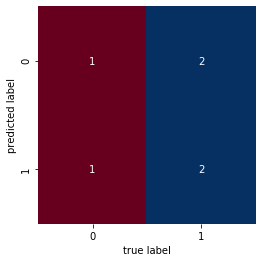


 Classification Report 

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6

Accuracy:  0.5
Precision Score:  0.5
Recall Score:  0.6666666666666666
F1 Score:  0.5714285714285715
AUC:  0.5555555555555556


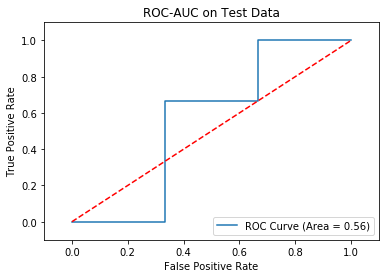

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

 Naive Bayes

 Confusion Matrix


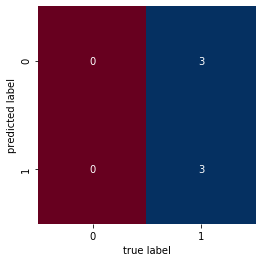


 Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6

Accuracy:  0.5
Precision Score:  0.5
Recall Score:  1.0
F1 Score:  0.6666666666666666
AUC:  0.22222222222222224


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


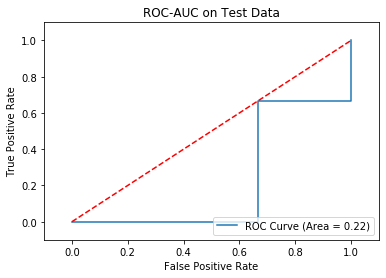

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

 Decision Tree

 Confusion Matrix


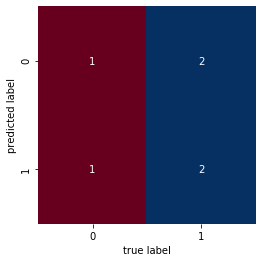


 Classification Report 

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6

Accuracy:  0.5
Precision Score:  0.5
Recall Score:  0.6666666666666666
F1 Score:  0.5714285714285715
AUC:  0.5


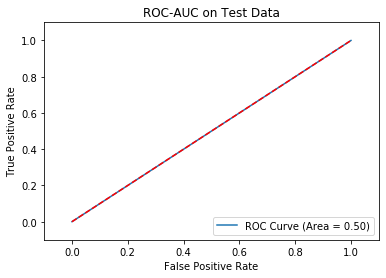

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

 Random Forest

 Confusion Matrix


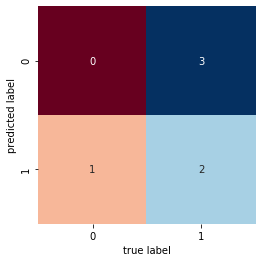


 Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      0.67      0.50         3

    accuracy                           0.33         6
   macro avg       0.20      0.33      0.25         6
weighted avg       0.20      0.33      0.25         6

Accuracy:  0.3333333333333333
Precision Score:  0.4
Recall Score:  0.6666666666666666
F1 Score:  0.5
AUC:  0.4444444444444445


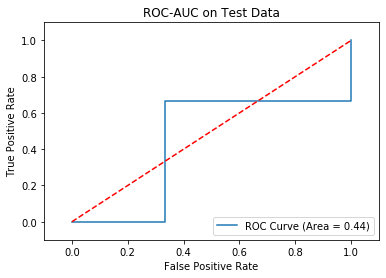

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

 Gradient Boosting

 Confusion Matrix


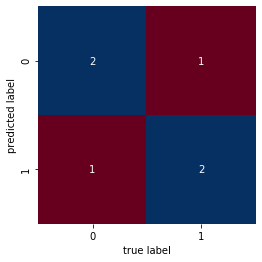


 Classification Report 

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6

Accuracy:  0.6666666666666666
Precision Score:  0.6666666666666666
Recall Score:  0.6666666666666666
F1 Score:  0.6666666666666666
AUC:  0.5555555555555556


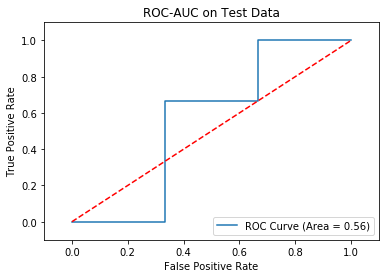

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------


In [72]:
model_data(X_train, X_test, Y_train, Y_test)